In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
!pip install sklearn

In [3]:
df=pd.read_csv('city_day.csv',parse_dates = ["Date"])
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


<AxesSubplot:>

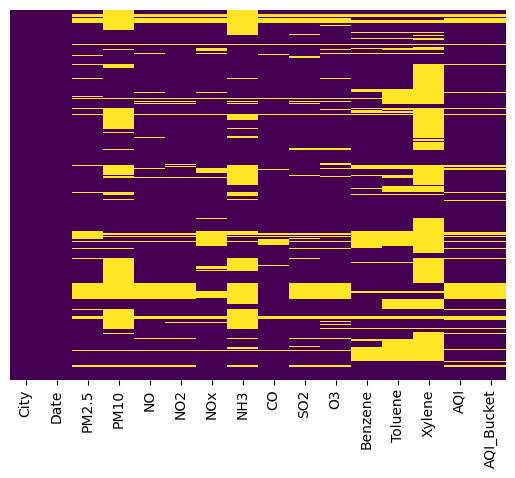

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
print(df.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [7]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
City           0.000000
Date           0.000000
dtype: float64

In [8]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [9]:
#converting dtype of date column to datetime
df['Date']=df['Date'].apply(pd.to_datetime)
#setting date column as index
df.set_index('Date',inplace=True)

In [10]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [11]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols] = df.groupby("City")[numeric_cols].transform(lambda x: x.fillna(x.mean()))
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.000000,0.020000,0.000000,452.122939,NaN
2015-01-02,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.680000,5.500000,3.770000,452.122939,NaN
2015-01-03,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.800000,16.400000,2.250000,452.122939,NaN
2015-01-04,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.430000,10.140000,1.000000,452.122939,NaN
2015-01-05,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.010000,18.890000,2.780000,452.122939,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.000000,Good
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.000000,Satisfactory
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.000000,Satisfactory


<AxesSubplot:ylabel='Date'>

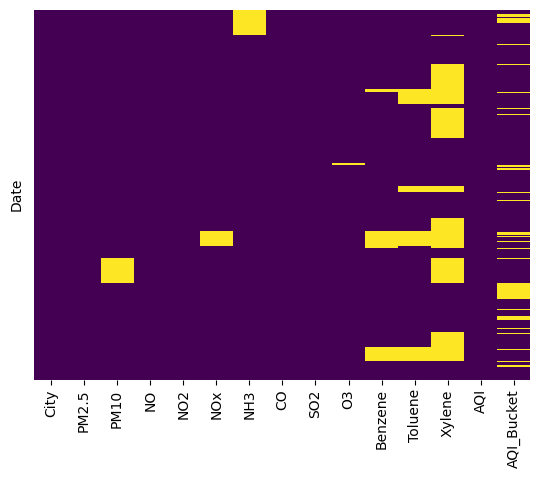

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,0.000000,0.020000,0.000000,452.122939,NaN
2015-01-02,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,3.680000,5.500000,3.770000,452.122939,NaN
2015-01-03,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,6.800000,16.400000,2.250000,452.122939,NaN
2015-01-04,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,4.430000,10.140000,1.000000,452.122939,NaN
2015-01-05,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,7.010000,18.890000,2.780000,452.122939,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.000000,Good
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.000000,Satisfactory
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.000000,Satisfactory


<AxesSubplot:ylabel='Date'>

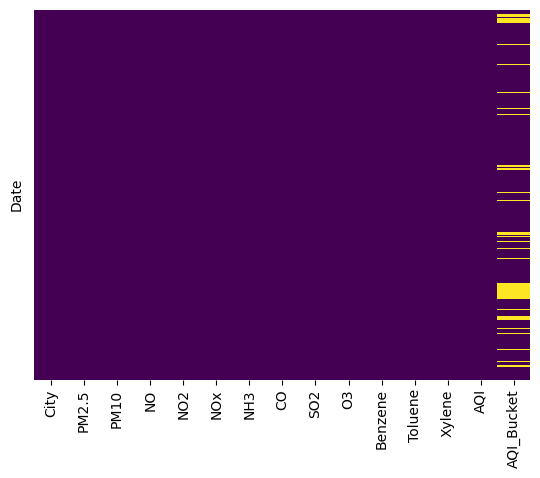

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
# PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0
df["PM10_SubIndex"] = pd.to_numeric(df["PM10"], errors='coerce').apply(lambda x: get_PM10_subindex(x))
# df["PM10_SubIndex"] = df["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))
    
# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0
df["PM2.5_SubIndex"] = pd.to_numeric(df["PM2.5"], errors='coerce').apply(lambda x: get_PM25_subindex(x))
# df["PM2.5_SubIndex"] = df["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))


# SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = pd.to_numeric(df["SO2"], errors='coerce').apply(lambda x: get_SO2_subindex(x))

# NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = pd.to_numeric(df["NOx"], errors='coerce').apply(lambda x: get_NOx_subindex(x))

# NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = pd.to_numeric(df["NH3"], errors='coerce').apply(lambda x: get_NH3_subindex(x))

# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = pd.to_numeric(df["CO"], errors='coerce').apply(lambda x: get_CO_subindex(x))

# O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = pd.to_numeric(df["O3"], errors='coerce').apply(lambda x: get_O3_subindex(x))

# AQI calculation
df["AQI"] = df[["PM2.5_SubIndex", "PM10_SubIndex"]].max(axis=1)

# Print the first 5 rows of the DataFrame
print(df.head())

                 City      PM2.5        PM10     NO    NO2    NOx        NH3  \
Date                                                                           
2015-01-01  Ahmedabad  67.854497  114.584029   0.92  18.22  17.15  23.024137   
2015-01-02  Ahmedabad  67.854497  114.584029   0.97  15.69  16.46  23.024137   
2015-01-03  Ahmedabad  67.854497  114.584029  17.40  19.30  29.70  23.024137   
2015-01-04  Ahmedabad  67.854497  114.584029   1.70  18.48  17.97  23.024137   
2015-01-05  Ahmedabad  67.854497  114.584029  22.10  21.42  37.76  23.024137   

               CO    SO2      O3  ...  Xylene         AQI  AQI_Bucket  \
Date                              ...                                   
2015-01-01   0.92  27.64  133.36  ...    0.00  126.181656         NaN   
2015-01-02   0.97  24.55   34.06  ...    3.77  126.181656         NaN   
2015-01-03  17.40  29.07   30.70  ...    2.25  126.181656         NaN   
2015-01-04   1.70  18.59   36.08  ...    1.00  126.181656         NaN   
2

In [16]:
df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1)))


In [17]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,...,0.000000,126.181656,NaN,109.722686,126.181656,34.5500,21.4375,5.756034,46.000000,149.058824
2015-01-02,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,...,3.770000,126.181656,NaN,109.722686,126.181656,30.6875,20.5750,5.756034,48.500000,34.060000
2015-01-03,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,...,2.250000,126.181656,NaN,109.722686,126.181656,36.3375,37.1250,5.756034,302.352941,30.700000
2015-01-04,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,...,1.000000,126.181656,NaN,109.722686,126.181656,23.2375,22.4625,5.756034,85.000000,36.080000
2015-01-05,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,...,2.780000,126.181656,NaN,109.722686,126.181656,49.1625,47.2000,5.756034,330.000000,39.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,...,0.730000,50.940000,Good,50.940000,25.033333,10.6875,24.4250,3.117500,23.500000,23.300000
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,...,0.380000,74.090000,Satisfactory,74.090000,40.633333,15.9000,20.6625,2.997500,26.000000,30.140000
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,...,0.000000,65.730000,Satisfactory,65.730000,38.183333,10.5250,22.9125,2.677500,24.000000,30.960000


<AxesSubplot:ylabel='Date'>

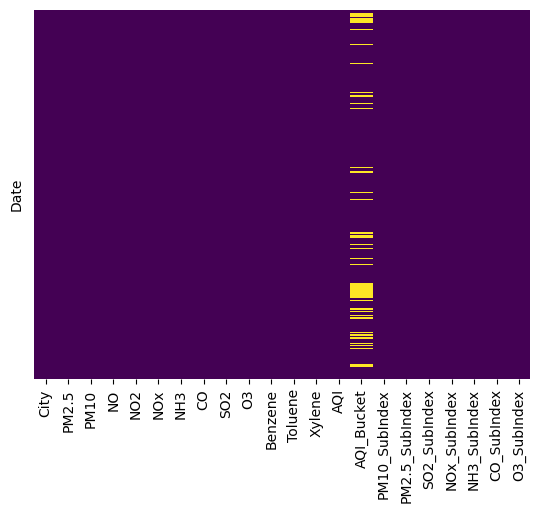

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

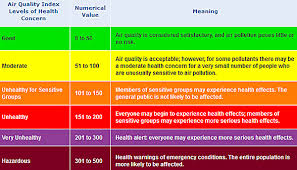

In [19]:
from IPython import display 
display.Image("images.jpg",width = 400, height = 200)

In [20]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))

In [21]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,...,0.000000,126.181656,Moderate,109.722686,126.181656,34.5500,21.4375,5.756034,46.000000,149.058824
2015-01-02,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,...,3.770000,126.181656,Moderate,109.722686,126.181656,30.6875,20.5750,5.756034,48.500000,34.060000
2015-01-03,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,...,2.250000,126.181656,Moderate,109.722686,126.181656,36.3375,37.1250,5.756034,302.352941,30.700000
2015-01-04,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,...,1.000000,126.181656,Moderate,109.722686,126.181656,23.2375,22.4625,5.756034,85.000000,36.080000
2015-01-05,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,...,2.780000,126.181656,Moderate,109.722686,126.181656,49.1625,47.2000,5.756034,330.000000,39.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,...,0.730000,50.940000,Good,50.940000,25.033333,10.6875,24.4250,3.117500,23.500000,23.300000
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,...,0.380000,74.090000,Satisfactory,74.090000,40.633333,15.9000,20.6625,2.997500,26.000000,30.140000
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,...,0.000000,65.730000,Satisfactory,65.730000,38.183333,10.5250,22.9125,2.677500,24.000000,30.960000


<AxesSubplot:ylabel='Date'>

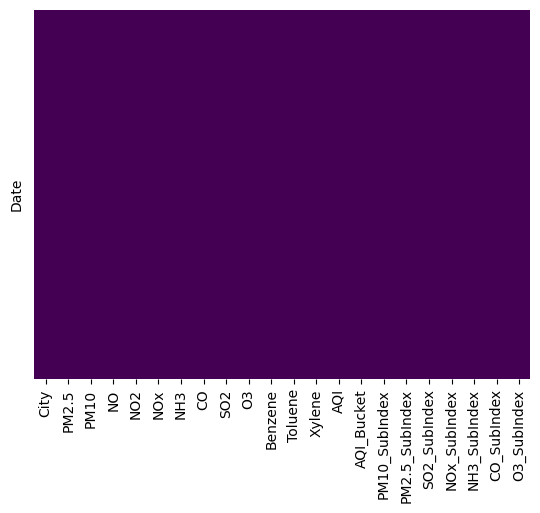

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'PM10_SubIndex',
       'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

In [24]:
df_city_day = df.copy()
df_city_day.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'PM10_SubIndex',
       'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

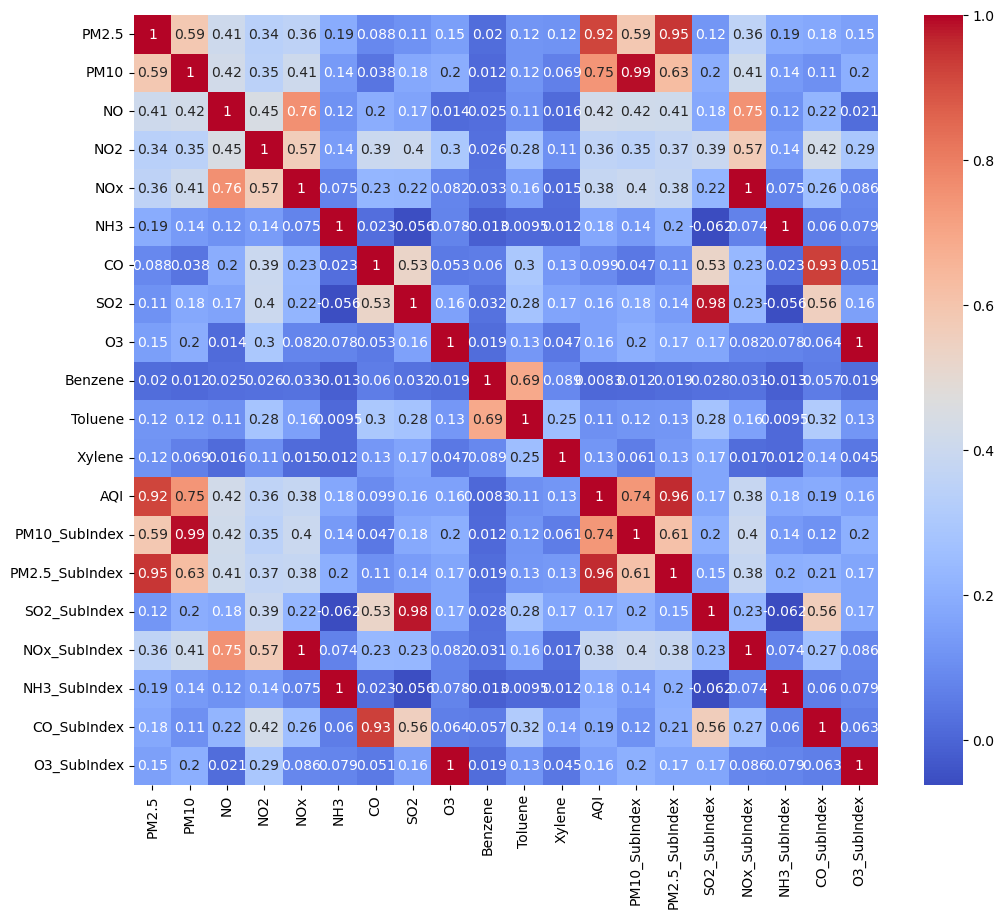

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

Distribution of different pollutants in last 5 years


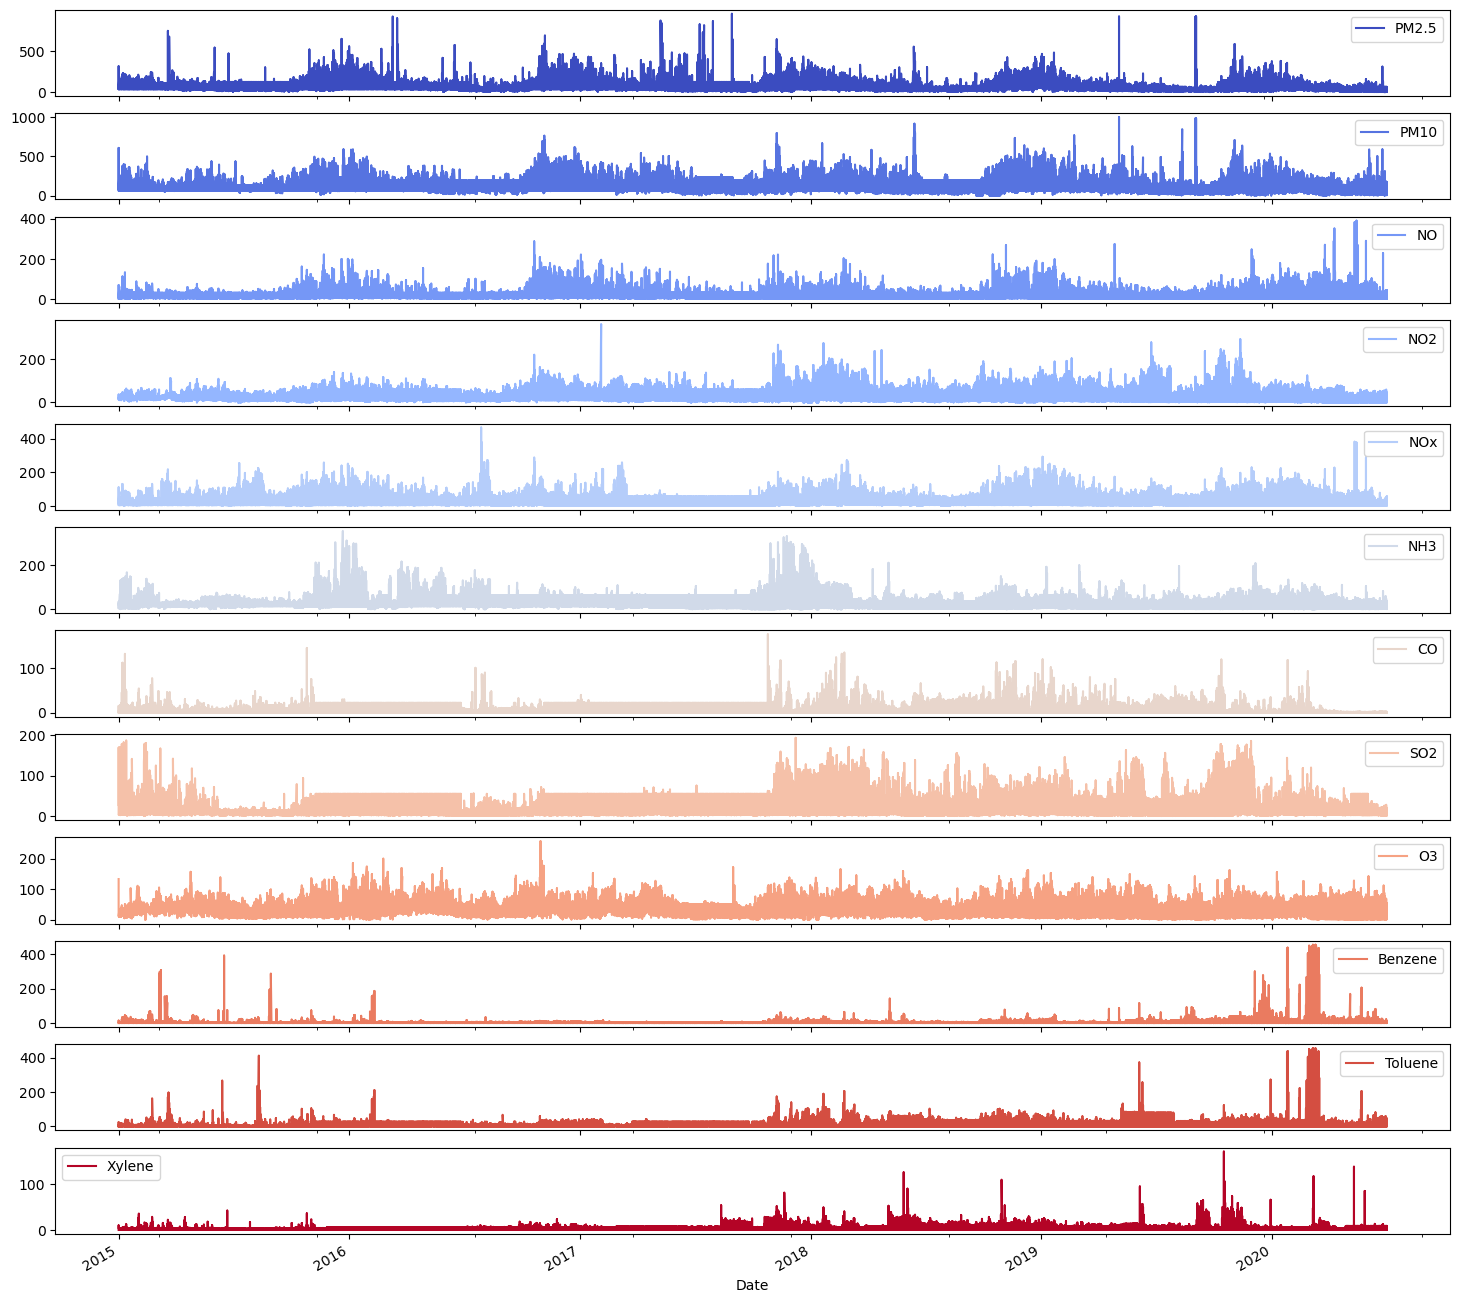

In [26]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']
df_city_day = df_city_day[pollutants]

print('Distribution of different pollutants in last 5 years')
df_city_day.plot(kind='line',figsize=(18,18),cmap='coolwarm',subplots=True,fontsize=10);

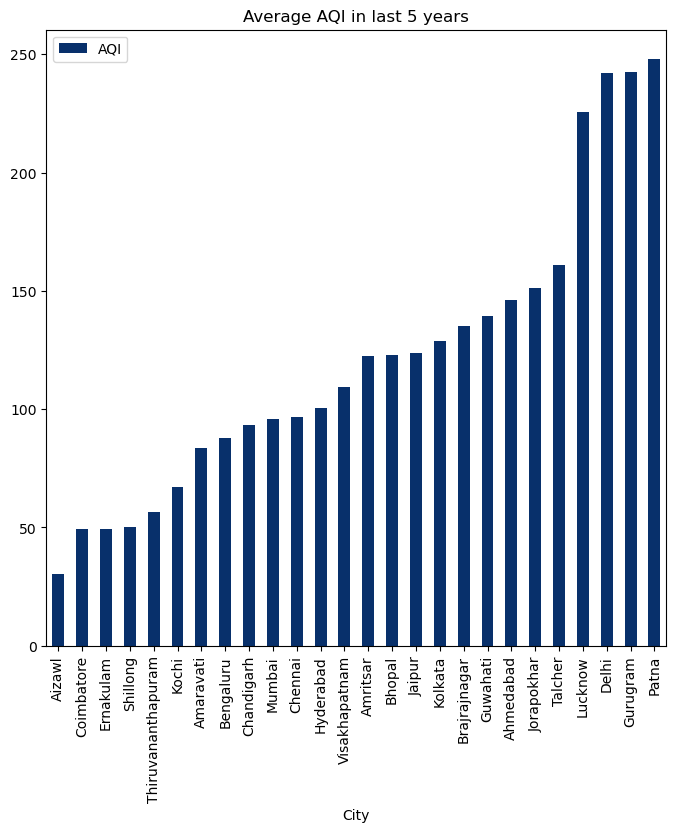

In [27]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 5 years');

In [28]:
#Creating Model for predicting the Output
final_df= df[['AQI', 'AQI_Bucket']].copy()
final_df

,AQI,AQI_Bucket
Date,,
2015-01-01,126.181656,Moderate
2015-01-02,126.181656,Moderate
2015-01-03,126.181656,Moderate
2015-01-04,126.181656,Moderate
2015-01-05,126.181656,Moderate
...,...,...
2020-06-27,50.940000,Good
2020-06-28,74.090000,Satisfactory
2020-06-29,65.730000,Satisfactory


In [29]:
final_df['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

In [30]:
#final_df = pd.get_dummies(final_df)
final_df['AQI_Bucket'] = final_df['AQI_Bucket'].map({'Good' :0, 'Satisfactory' :1, 'Moderate' :2, 'Poor' :3, 'Very Poor' :4, 'Severe' :5}).astype(int) #mapping numbers
final_df.head()

,AQI,AQI_Bucket
Date,,
2015-01-01,126.181656,2
2015-01-02,126.181656,2
2015-01-03,126.181656,2
2015-01-04,126.181656,2
2015-01-05,126.181656,2


In [31]:
#Predicting the values of AQI_Bucket w.r.t values of AQI using Random Forest Classifier
X = final_df[['AQI']]
y = final_df[['AQI_Bucket']]

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = RandomForestClassifier(random_state = 0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4924\2930373155.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier(random_state = 0).fit(X_train, y_train)


In [33]:
print("Enter the value of AQI:")
AQI = float(input("AQI : "))
output = clf.predict([[AQI]])
output
#0-->Good
#1-->Satisfactory
#2-->moderate
#3-->poor
#4-->Very poor
#5-->Severe

Enter the value of AQI:


AQI :  110


G:\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6570499796830557
              precision    recall  f1-score   support

           0       0.44      0.36      0.40       375
           1       0.70      0.76      0.73      2471
           2       0.72      0.69      0.70      2721
           3       0.52      0.46      0.49       795
           4       0.70      0.64      0.67       700
           5       0.35      0.45      0.39       321

    accuracy                           0.66      7383
   macro avg       0.57      0.56      0.56      7383
weighted avg       0.66      0.66      0.66      7383

[[ 135  210   28    2    0    0]
 [ 149 1887  407   16    1   11]
 [  22  543 1874  164   33   85]
 [   1   41  215  367   98   73]
 [   0   11   25  118  445  101]
 [   1   13   62   43   59  143]]
